In [1]:
### Loading the necessary libraries
import pandas as pd
import numpy as np
import os

In [6]:
### Reading an excel file using read_excel function
Demo= pd.read_excel("Demographics.xlsx",sheet_name="Demographics")
### Reading other two sheets
Prod= pd.read_excel("Products.xlsx",sheet_name="ProductData")
Trans= pd.read_excel("Transactions.xlsx",sheet_name="TransactionsData")

In [4]:
### Display the column names of the demographic data
Demo.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'],
      dtype='object')

##### After reading all the required files. Let's do a preliminary analysis.
- Generally this consists of understanding of the data 
    - How many records and how many attributes are there 
    - What are the data types of these attributes 
    - Are there any missing values in the data 

In [7]:
### Looking at the first three records
print('DEMO HEAD\n',Demo.head(3))
print("\n")
print("\n")

### Looking at the last three records
print('DEMO TAIL \n',Demo.tail(3))
print("\n")
print("\n")

Demo.describe(include='all')

DEMO HEAD
    User_ID Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0  1000001      F  15.0          10             A                          2   
1  1000002      M  69.0          16             C                         4+   
2  1000003      M  34.0          15             A                          3   

   Marital_Status  
0               0  
1               0  
2               0  




DEMO TAIL 
       User_ID Gender   Age  Occupation City_Category  \
5905  1007092      M  45.0           8             C   
5906  1007095      M  41.0           8             C   
5907  1007099      F  47.0           8             C   

     Stay_In_Current_City_Years  Marital_Status  
5905                         4+               1  
5906                         4+               1  
5907                         4+               1  






,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,5.908000e+03,5908,5905.000000,5908.000000,5908,5908,5908.000000
unique,NaN,2,NaN,NaN,3,7,NaN
top,NaN,M,NaN,NaN,C,1,NaN
freq,NaN,4235,NaN,NaN,3149,2086,NaN
mean,1.003027e+06,NaN,35.960711,8.155890,NaN,NaN,0.420785
std,1.749989e+03,NaN,12.986736,6.318067,NaN,NaN,0.493727
min,1.000001e+06,NaN,15.000000,0.000000,NaN,NaN,0.000000
25%,1.001515e+06,NaN,26.000000,3.000000,NaN,NaN,0.000000
50%,1.003026e+06,NaN,34.000000,7.000000,NaN,NaN,0.000000
75%,1.004536e+06,NaN,45.000000,14.000000,NaN,NaN,1.000000


To observe the data types of each attribute
- We use dataframe.dtypes
- The data types given are how python interpreted them. Sometimes, they may be interpreted incorrectly. In such cases, we may have to change them to appropriate data types
    - Data types we have Integer/Numeric, Object (Category), Boolean.

### Question: What are data types of Prod and Trans

In [9]:
### Solution
print(Trans.dtypes,'\n\n',Prod.dtypes)

Date          object
User_ID        int64
Product_ID    object
Purchase       int64
dtype: object 

 Product_ID          object
Product_Category     int64
dtype: object


- Observe that the Product Category data type is interpreted as integer but we know that it should be a category. Just because it was represented in numbers, it was interpreted as numeric. So we need to convert it to category
    - We use column.astype() function to change the data type

#### Let's understand what is there in each data file

In [10]:
Demo.User_ID.nunique()

5900

In [15]:
## Analysing the duplicate records
# x=Demo.duplicated(keep='first')
# Demo[x]
Demo[Demo.duplicated(keep='first')]

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
12,1000012,M,30.0,12,C,2,0
66,1000067,F,55.0,5,C,4+,1
67,1000067,F,55.0,5,C,4+,1
68,1000067,F,55.0,5,C,4+,1
221,1000220,M,34.0,12,A,3,0
222,1000220,M,34.0,12,A,3,0
1126,1001158,F,39.0,1,C,2,1
2151,1002203,M,49.0,12,B,4+,1


In [16]:
## Ignoring the duplicate records
Data=Demo.drop_duplicates(keep='first')
print(Data.shape)
print(Data['User_ID'].nunique())

(5900, 7)
5900


#### We start with demographics data
Is customer data dominating by any particular demographic segment? Or uniform?

In [17]:
### What is the proportion of Male and Female
Data.Gender.value_counts(normalize=True) ## So we have about 72% male and 28% female. 

M    0.717119
F    0.282881
Name: Gender, dtype: float64

Question: How many customers are there by each City_Category. These questions will allow us to analyse if there are more number of customers belonging to one particular city or it is uniform and so on

In [18]:
Data.groupby(['City_Category'])['User_ID'].count()

City_Category
A    1048
B    1708
C    3144
Name: User_ID, dtype: int64

- Missing Value and Extreme Value analysis
    - Whenever we get the data, we need to check if the data has any missing or extreme values/ anomalies in the data which might affect our analysis

In [19]:
## To get the missing values in the data
Data.isna().sum()

User_ID                       0
Gender                        0
Age                           3
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64

In [20]:
## Method 1
Data_ig=Data.dropna()
print("Data_ignored records are: ",Data_ig.shape)
print("Data_org records are: ",Data.shape)
print("\n")

Data_ignored records are:  (5897, 7)
Data_org records are:  (5900, 7)




- Imputing the missing values
    - Imputing is basically a method of "guessing" the value in place of missing value. One method of imputation is central imputation where you replace the null value with the mean value of the column
    - But before imputing, we need to check if there are any extreme values in the data because the extreme values can impact the mean values.

- Observe that there are some points above 100 and the max is about 129 (recall that we got the max value when we used the describe function on the data. These values could be anamolies. One of the approaches to tackle these extremevalues isto ignore the records before imputing the data. We can discuss other methods later

In [26]:
##Removing the extreme values
Data1=Data[~Data.Age.isin(range(100,200))] # ~ before data is used to for exception.
print("Dim of the processed data: ", Data1.shape)
print("Missing values in Data processed", Data1.isna().sum())

Dim of the processed data:  (5898, 7)
Missing values in Data processed User_ID                       0
Gender                        0
Age                           3
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64


- Age Group binning
    - Age is numeric data. But the question we need to ask is does a 50 year old person behaviur would be different from 51 year old. Or a 21 year old behaviour be different from 22 year old. If not, then we need not want individual information on age but we need a collective information like what products are being purchased by a specific age group ( and not individual)
    - In order to group the customers based on Age we create our custom bins like 0-17 years, 18-25 years, 26-35 years, 36-45 years, 46-50 years, 51-55 years and 55+.

In [ ]:
bins = [0, 17, 25, 35, 45, 50, 55,100]
labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

Data1['Age_Group'] = pd.cut(Data1['Age'], bins=bins, labels=labels)

### Question: Is there are particular age group that are more in number or is it uniform

In [28]:
Data1.groupby(['Age_Group'])['User_ID'].count()

Age_Group
0-17      218
18-25    1069
26-35    2053
36-45    1170
46-50     532
51-55     494
55+       359
Name: User_ID, dtype: int64

#### Let's work on Transactions data
Highest revenue generating customers 

In [29]:
Data=Trans.groupby(['User_ID'])['Purchase'].sum()
### Looking at top 10 Customers
Data.sort_values(ascending=False)[:10]

User_ID
1001680    401302
1004277    382836
1001015    317057
1001980    284272
1003224    282424
1005831    281230
1003391    281033
1001181    280374
1003618    274230
1000889    269989
Name: Purchase, dtype: int64

##### Since there are so many products, instead of going with product_id, can we go with product category. For this, we may need to merge the data of POS with Prod so that we can map each product to their respective product category
- Let's understand the merge

In [30]:
### Merging the data frame
Prod_Trans=pd.merge(Trans,Prod,on='Product_ID',how='left')

In [31]:
### How many records for each product category
Prod_Trans['Product_Category']=Prod_Trans['Product_Category'].astype('category')
Prod_Trans['Product_Category'].value_counts()

4     123311
7      92941
1      16842
10      9681
2       8167
3       6400
5       1360
13      1069
12      1047
9        216
6        216
14       164
8         81
11        12
Name: Product_Category, dtype: int64

### Question: How many products are there in each product category

In [32]:
Prod_Trans.groupby(['Product_Category'])['Product_ID'].nunique().sort_values(ascending=False)

Product_Category
7     1012
4      947
1      473
10     231
2      148
5      105
13      92
3       89
12      74
6       61
9       17
14      10
11       4
8        1
Name: Product_ID, dtype: int64

- We observe that more number of products are available in product category 7

#### Understanding anomalies in the data

In [33]:
Prod_Trans['Z-score']=(Prod_Trans['Purchase']-Prod_Trans['Purchase'].mean())/Prod_Trans['Purchase'].std()

In [34]:
print(Prod_Trans.shape)
Out=Prod_Trans[(Prod_Trans['Z-score']>3)|(Prod_Trans['Z-score']<-3)].index
print(len(Out))
Out

(261507, 6)
12


Int64Index([261488, 261489, 261490, 261491, 261492, 261493, 261496, 261497,
            261501, 261502, 261503, 261506],
           dtype='int64')

In [42]:
# Prod_Trans['Purchase'].quantile([0,0.25,0.5,0.75,1])

0.00     502.0
0.25     610.0
0.50     741.0
0.75     829.0
1.00    3850.0
Name: Purchase, dtype: float64

In [43]:
Prod_Trans.iloc[Out]

,Date,User_ID,Product_ID,Purchase,Product_Category,Z-score
261488,16-8-2018,1007021,P1003112,2500,11,12.537388
261489,6-7-2018,1007021,P1005887,3850,11,22.151956
261490,13-8-2018,1007021,P1003381,1750,11,7.195962
261491,5-8-2018,1007028,P1003381,1750,11,7.195962
261492,11-7-2018,1007028,P1003112,2500,11,12.537388
261493,18-7-2018,1007028,P1005887,3850,11,22.151956
261496,12-9-2018,1007081,P1003221,3550,11,20.015386
261497,10-7-2018,1007091,P1003221,3550,11,20.015386
261501,20-9-2018,1007092,P1003221,3550,11,20.015386
261502,12-9-2018,1007092,P1003112,2500,11,12.537388


- Observe that all the records that have very high value of purchase belong to item category 11
- With this observation, what can be done? Can we include category 11 with all other categories and perform the analysis or since they are very different (in terms of revenue) should they be analysed separately?

#### Understanding data with respect to time

In [44]:
Prod_Trans.head(5)

,Date,User_ID,Product_ID,Purchase,Product_Category,Z-score
0,28-9-2018,1000001,P00069042,837,3,0.693665
1,29-7-2018,1000001,P00117942,884,4,1.028394
2,28-7-2018,1000001,P00258742,691,4,-0.346133
3,27-7-2018,1000001,P00142242,788,7,0.344692
4,29-7-2018,1000001,P00297042,784,7,0.316204


In [45]:
### Coversion of date to date time object
Prod_Trans['Date']=pd.to_datetime(Prod_Trans['Date'],format="%d-%m-%Y")
Prod_Trans.dtypes

Date                datetime64[ns]
User_ID                      int64
Product_ID                  object
Purchase                     int64
Product_Category          category
Z-score                    float64
dtype: object

In [46]:
##Getting the week and months from the data
Prod_Trans['Week']=Prod_Trans['Date'].dt.week
Prod_Trans['Month']=Prod_Trans['Date'].dt.month
Prod_Trans.head(5)

,Date,User_ID,Product_ID,Purchase,Product_Category,Z-score,Week,Month
0,2018-09-28,1000001,P00069042,837,3,0.693665,39,9
1,2018-07-29,1000001,P00117942,884,4,1.028394,30,7
2,2018-07-28,1000001,P00258742,691,4,-0.346133,30,7
3,2018-07-27,1000001,P00142242,788,7,0.344692,30,7
4,2018-07-29,1000001,P00297042,784,7,0.316204,30,7


- Which month have highest number of sales

In [47]:
Sales_by_month=Prod_Trans.groupby(['Month'])['Purchase'].sum()
Sales_by_month.sort_values(ascending=False)[:10]

Month
7    64918618
9    64283305
8    64208962
Name: Purchase, dtype: int64

- We can also check weekly sales 

#### Aggregating to the customer level
- We have observed that, there are 5900 unique customers with over 250k transactions in one quarter of 2018. If we want to profile the customers based on which one can design the approaches to improve the business, we need more information
    - This can be obtained in two ways a) from the client b) derived- based on the information available, can we derive some more attriutes that makes more sense to use.
    - In this case, for example, we can derive, how many products purchased, what is average spending (per item or per month), is the customer repeatedly buying the same product or is he exploring different product catevories and products and so on. Let's derive some of the attributes

In [28]:
User_profile=Prod_Trans.groupby(['User_ID']).agg(
{'Product_ID':{
    'Number of Items': 'count',
    'Unique Items':'nunique'
},
 'Purchase':{
     'Total Purchase':'sum',
     'Average per Transaction':'mean'
 },
 'Product_Category':{
     'Number of categories':'nunique'
 }
}
)

C:\Users\Somagiri\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [29]:
User_profile.columns

MultiIndex(levels=[['Product_ID', 'Purchase', 'Product_Category'], ['Average per Transaction', 'Number of Items', 'Number of categories', 'Total Purchase', 'Unique Items']],
           codes=[[0, 0, 1, 1, 2], [1, 4, 3, 0, 2]])

In [30]:
### Removing the multi level index on columnsto create a regular dataframe
User_profile.columns = User_profile.columns.to_flat_index()
User_profile.head(5)

,"(Product_ID, Number of Items)","(Product_ID, Unique Items)","(Purchase, Total Purchase)","(Purchase, Average per Transaction)","(Product_Category, Number of categories)"
User_ID,,,,,
1000001,12,12,9979,831.583333,3
1000002,37,37,28416,768.000000,4
1000003,10,10,7329,732.900000,3
1000005,55,55,38641,702.563636,7
1000006,19,19,14162,745.368421,4


In [31]:
### Modifying the column names
User_profile.columns=['No_of_Trans','Unique_Products','Total_Amt','Avg_Amt_per_Trans','No_of_unique_Categories']
User_profile.head(5)

,No_of_Trans,Unique_Products,Total_Amt,Avg_Amt_per_Trans,No_of_unique_Categories
User_ID,,,,,
1000001,12,12,9979,831.583333,3
1000002,37,37,28416,768.000000,4
1000003,10,10,7329,732.900000,3
1000005,55,55,38641,702.563636,7
1000006,19,19,14162,745.368421,4


Deriving new features

In [32]:
### Deriving other attributes
User_profile['Avg_Trans_per_Category']=User_profile['Total_Amt']/User_profile['No_of_unique_Categories']

In [33]:
### To identify if the person has a favorite product category or explore all categories
User_profile1=Prod_Trans.groupby(['User_ID','Product_Category'])['Product_ID'].count()

User_profile1.head(10)

User_ID  Product_Category
1000001  3                    3
         4                    2
         7                    7
1000002  1                    4
         4                   12
         5                    1
         7                   20
1000003  1                    1
         4                    8
         7                    1
Name: Product_ID, dtype: int64

In [34]:
User_profile1=User_profile1.reset_index()
print(type(User_profile1))
User_profile1.head(5)

<class 'pandas.core.frame.DataFrame'>


,User_ID,Product_Category,Product_ID
0,1000001,3,3
1,1000001,4,2
2,1000001,7,7
3,1000002,1,4
4,1000002,4,12


In [35]:
### Casting the data so that we know how many product categories user brought
User_pivot=User_profile1.pivot(index='User_ID',columns='Product_Category',values="Product_ID")
User_pivot=User_pivot.fillna(0)

In [36]:
### To make manipulations on data, we shall convert columns of categorical index to string type
User_pivot.columns=User_pivot.columns.astype('str')
User_pivot.reset_index()
User_pivot.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14'],
      dtype='object', name='Product_Category')

In [37]:
### Writing a custom function to identify if user has a favourite product category
def favorite(lst):
    f=np.max(lst)/np.sum(lst)
    return(f)
User_pivot['val'] = pd.DataFrame(User_pivot.apply(favorite, axis=1))

In [38]:
User_pivot.loc[User_pivot.val >= 0.6, 'Fav'] = 1 
User_pivot.loc[User_pivot.val<0.6, 'Fav'] = 0 
User_pivot.head(3)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,val,Fav
User_ID,,,,,,,,,,,,,,,,
1000001,0.0,0.0,3.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.583333,0.0
1000002,4.0,0.0,0.0,12.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540541,0.0
1000003,1.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,1.0


In [39]:
User_profile=pd.merge(User_profile,User_pivot['Fav'],left_index=True,right_index=True)
User_profile.head(10)

,No_of_Trans,Unique_Products,Total_Amt,Avg_Amt_per_Trans,No_of_unique_Categories,Avg_Trans_per_Category,Fav
User_ID,,,,,,,
1000001,12,12,9979,831.583333,3,3326.333333,0.0
1000002,37,37,28416,768.000000,4,7104.000000,0.0
1000003,10,10,7329,732.900000,3,2443.000000,1.0
1000005,55,55,38641,702.563636,7,5520.142857,0.0
1000006,19,19,14162,745.368421,4,3540.500000,0.0
1000007,2,2,1439,719.500000,2,719.500000,0.0
1000008,49,49,37375,762.755102,3,12458.333333,1.0
1000009,29,29,20751,715.551724,3,6917.000000,1.0
1000010,122,122,92959,761.959016,7,13279.857143,1.0


## Visualizations

### Questions  can be asked on the Demographic data with the available information. 
    How many Male and Female customers or their percentage ?
    How many no of people are Married/Unmarried Category ?
        This can also be checked gender wise    
    No of Customers in each City type ?
    What is the Age distribution of Customers ?
        We can also check city wise.
    Is there any Extreme values in the Age ?
        This can also be done City Wise.
    Segment the Customers based on their stay in the City ?

In [40]:
print(Data1['Gender'].value_counts() )


M    4229
F    1669
Name: Gender, dtype: int64


In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(['Male','Female'],Data1['Gender'].value_counts())
plt.title('Frequency of male and female',fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Frequency",fontSIZE=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

<Figure size 1000x500 with 1 Axes>

<Figure size 720x576 with 0 Axes>

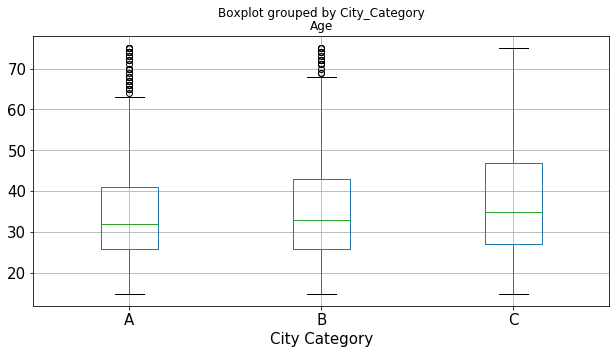

In [42]:
plt.figure(figsize=(10,8))
Data1.boxplot('Age',by='City_Category',figsize=(10,5))
plt.xlabel('City Category',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

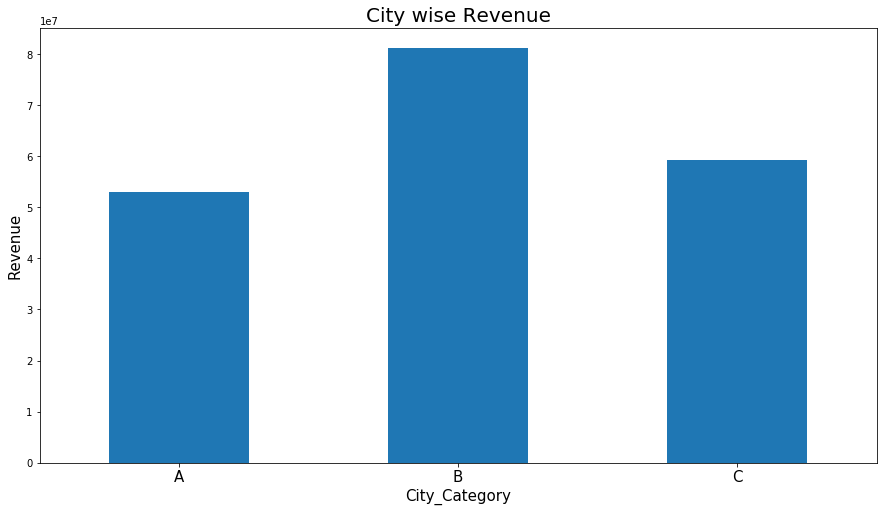

In [43]:
plt.figure(figsize=(15,8))
pos_demo=pd.merge(Trans,Data1)
revenue_city=pos_demo[['City_Category','Purchase']].groupby(['City_Category'])['Purchase'].sum()
ax=revenue_city.plot(kind='bar')
plt.xlabel('City_Category',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('City wise Revenue',fontsize=20)
plt.xticks(rotation=0,fontsize=15)
plt.show()

In [44]:
pos_demo.columns

Index(['Date', 'User_ID', 'Product_ID', 'Purchase', 'Gender', 'Age',
       'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Age_Group'],
      dtype='object')

In [45]:
from ipywidgets import widgets, interactive,fixed,interact
def boxplot_Purchase_Cat(df,attr):
    #plt.figure(figsize=(10,5))
    col_ind=np.where(attr==pos_demo.columns)
    df1=pd.DataFrame(df.groupby(['User_ID',attr])['Purchase'].sum()).reset_index()
   
    df1.boxplot('Purchase',by=attr,fontsize=10,figsize=(10,5))
    plt.xlabel(pos_demo.columns[col_ind], fontsize=20, color='black', alpha = 0.8)
    plt.ylabel('Purchase ',fontsize=20, color='black', alpha = 0.8)
    plt.xticks(fontsize=15,rotation=45)
    plt.yticks(fontsize=15)
    plt.show()
l1=['Gender','Occupation','City_Category','Marital_Status']
Cat_widget = widgets.Dropdown(
    options= list(l1),
    description='Analysis',fontsize=20
)

In [46]:
interactive(boxplot_Purchase_Cat,  attr=Cat_widget, df=fixed(pos_demo))

interactive(children=(Dropdown(description='Analysis', options=('Gender', 'Occupation', 'City_Category', 'Marital_Status'), value='Gender'), Output()), _dom_classes=('widget-interact',))

In [47]:
pos_demo['Date']=pd.to_datetime(pos_demo['Date'],format="%d-%m-%Y")
pos_demo.dtypes

Date                          datetime64[ns]
User_ID                                int64
Product_ID                            object
Purchase                               int64
Gender                                object
Age                                  float64
Occupation                             int64
City_Category                         object
Stay_In_Current_City_Years            object
Marital_Status                         int64
Age_Group                           category
dtype: object

In [48]:
pos_demo['Week']=pos_demo['Date'].dt.week
pos_demo['Month']=pos_demo['Date'].dt.month
pos_demo.head(5)

,Date,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_Group,Week,Month
0,2018-09-28,1000001,P00069042,837,F,15.0,10,A,2,0,0-17,39,9
1,2018-07-29,1000001,P00117942,884,F,15.0,10,A,2,0,0-17,30,7
2,2018-07-28,1000001,P00258742,691,F,15.0,10,A,2,0,0-17,30,7
3,2018-07-27,1000001,P00142242,788,F,15.0,10,A,2,0,0-17,30,7
4,2018-07-29,1000001,P00297042,784,F,15.0,10,A,2,0,0-17,30,7


Text(0, 0.5, 'Revenue')

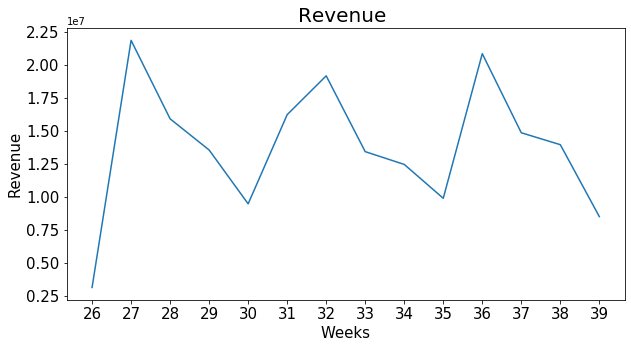

In [49]:
plt.figure(figsize=(10,5))
weekly_revenue=pd.DataFrame(pos_demo.groupby('Week')['Purchase'].sum()).reset_index(level=0)
weekly_revenue
plt.plot(weekly_revenue['Week'],weekly_revenue['Purchase'])
plt.title('Revenue ',fontsize=20)
plt.xlabel('Weeks',fontsize=15)
plt.xticks(weekly_revenue.Week,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Revenue',fontsize=15)

In [50]:
### Merging the data frame
Prod_pos_demo=pd.merge(pos_demo,Prod,on='Product_ID',how='left')

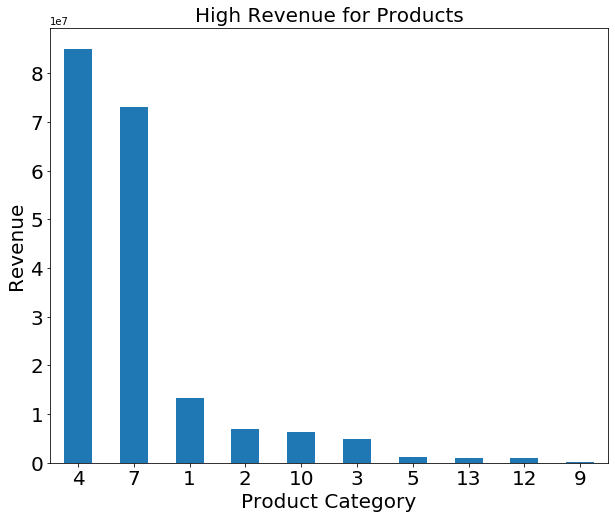

In [51]:
HighRevenue=Prod_pos_demo.groupby(['Product_Category'])['Purchase'].sum()
HighRev_top10=HighRevenue.sort_values(ascending=False)[:10]
HighRev_top10.plot(kind='bar',figsize=(10,8),title="ProductCategory vs Revenue")
plt.xlabel('Product Category',fontsize=20)
plt.ylabel('Revenue',fontsize=20)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.title("High Revenue for Products",fontsize=20)
plt.show()

#### Plotting at an aggegated level

In [52]:
User_profile.columns

Index(['No_of_Trans', 'Unique_Products', 'Total_Amt', 'Avg_Amt_per_Trans',
       'No_of_unique_Categories', 'Avg_Trans_per_Category', 'Fav'],
      dtype='object')

In [53]:
Data1.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Age_Group'],
      dtype='object')

In [54]:
User_profile['User_ID']=User_profile.index

In [55]:
del User_profile.index.name

In [56]:
User_profile.head(4)

,No_of_Trans,Unique_Products,Total_Amt,Avg_Amt_per_Trans,No_of_unique_Categories,Avg_Trans_per_Category,Fav,User_ID
1000001,12,12,9979,831.583333,3,3326.333333,0.0,1000001
1000002,37,37,28416,768.000000,4,7104.000000,0.0,1000002
1000003,10,10,7329,732.900000,3,2443.000000,1.0,1000003
1000005,55,55,38641,702.563636,7,5520.142857,0.0,1000005


In [57]:
User_Demo=pd.merge(User_profile,Data1,how='left')

In [58]:
User_Demo.head(3)

,No_of_Trans,Unique_Products,Total_Amt,Avg_Amt_per_Trans,No_of_unique_Categories,Avg_Trans_per_Category,Fav,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_Group
0,12,12,9979,831.583333,3,3326.333333,0.0,1000001,F,15.0,10.0,A,2,0.0,0-17
1,37,37,28416,768.000000,4,7104.000000,0.0,1000002,M,69.0,16.0,C,4+,0.0,55+
2,10,10,7329,732.900000,3,2443.000000,1.0,1000003,M,34.0,15.0,A,3,0.0,26-35


In [59]:
Data1=User_Demo.sort_values(by='Total_Amt',ascending=False)
print(Data1.head(10))
Cumulative=pd.DataFrame(Data1[['Total_Amt']].cumsum())
Cumulative.rename(columns={'Total_Amt':'Cumsum'},inplace=True)
print(Cumulative.head(10))

      No_of_Trans  Unique_Products  Total_Amt  Avg_Amt_per_Trans  \
1631          540              540     401302         743.151852   
4157          494              494     382836         774.971660   
979           431              431     317057         735.631090   
1920          389              389     284272         730.776350   
3130          380              380     282424         743.221053   
5670          380              380     281230         740.078947   
3292          358              358     281033         785.008380   
1139          416              416     280374         673.975962   
3512          420              420     274230         652.928571   
861           397              397     269989         680.073048   

      No_of_unique_Categories  Avg_Trans_per_Category  Fav  User_ID Gender  \
1631                       10            40130.200000  0.0  1001680      M   
4157                        9            42537.333333  0.0  1004277      M   
979              

In [60]:
#Cumulative=pd.DataFrame(Data1[['Total_Amt']].cumsum())
Perc=pd.DataFrame((Data1[['Total_Amt']].cumsum()/Data1[['Total_Amt']].sum())*100)
Perc.head(2)
Perc.rename(columns={'Total_Amt':'Percentage'},inplace=True)
Data1=pd.concat([Data1,Perc,Cumulative,],axis=1)

In [61]:
Data2=Data1[['User_ID','Total_Amt','Cumsum','Percentage']]
Data2.head(10)

,User_ID,Total_Amt,Cumsum,Percentage
1631,1001680,401302,401302,0.207487
4157,1004277,382836,784138,0.405426
979,1001015,317057,1101195,0.569355
1920,1001980,284272,1385467,0.716334
3130,1003224,282424,1667891,0.862356
5670,1005831,281230,1949121,1.007762
3292,1003391,281033,2230154,1.153065
1139,1001181,280374,2510528,1.298028
3512,1003618,274230,2784758,1.439815
861,1000889,269989,3054747,1.579408


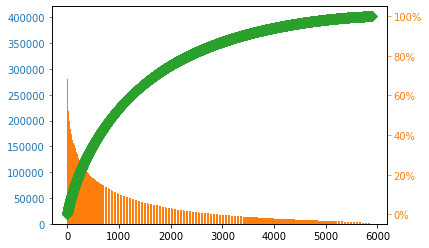

In [62]:
df=Data2
x2=df.shape[0]
x1=list(range(1,df.shape[0]+1,1))

from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots()
ax.bar(x1, df["Total_Amt"], color="C1")
ax2 = ax.twinx()
ax2.plot(x1, df["Percentage"], color="C2", marker="D",ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [63]:
os.chdir("D:\Infer\Infer Delivery Folder\Module 1\Day 04\Data")

In [64]:
Prom_data=pd.read_excel("StorePromotions.xlsx",sheet_name="StorePromotion")
Prom_data.head(10)

,Date,Coupon,Store,Units,Week
0,28-8-2018,0,2,20,35
1,26-7-2018,1,1,18,30
2,26-8-2018,1,2,21,35
3,26-9-2018,1,1,20,39
4,30-7-2018,1,3,16,31
5,27-8-2018,1,2,25,35
6,26-8-2018,1,2,17,35
7,28-7-2018,0,1,15,30
8,27-7-2018,0,2,18,30
9,26-9-2018,1,2,18,39


In [65]:
## We now need to separate the observations of Coupon 1 and Coupon 0
yes=Prom_data[Prom_data['Coupon']==1]
no=Prom_data[Prom_data['Coupon']==0]
yes.reset_index(inplace=True)
no.reset_index(inplace=True)

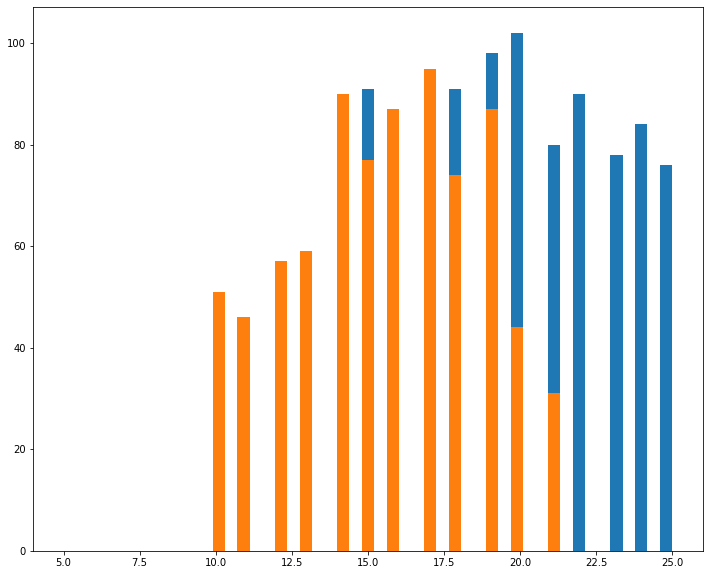

In [66]:
plt.figure(figsize=(12,10))
bins=np.linspace(5,25)
plt.hist(yes['Units'], bins, label='x')
plt.hist(no['Units'], bins, label='y')
plt.show()

In [67]:
import scipy.stats as stats
stats.ttest_ind(yes['Units'],no['Units'])

Ttest_indResult(statistic=29.865873914942735, pvalue=1.520962480697447e-158)

- Observe that the p-value for the t-statistic is very much less than 0.05, we can conclude that the sales during promotion are very different from sales during non-promotion. They are statistically different.
- The information given here is partial and there are other aspects that we need to know. These are given by the function from researchpy module

### From the given data, we understand that the promotion was done for a particular product on some days across the stores. We thoroughly checked if there is an influence of promotion overall and for each store. Now we want to know if the sales for this particular product is same across the stores?
- Think about this and frame your hypothesis

In [68]:
## We now need to obtain the sales of the products for each store
store1=Prom_data[Prom_data['Store']==1]
store2=Prom_data[Prom_data['Store']==2]
store3=Prom_data[Prom_data['Store']==3]

In [69]:
stats.f_oneway(store1['Units'],store2['Units'],store3['Units'])

F_onewayResult(statistic=18.294048224742497, pvalue=1.372510387931901e-08)

- Interpretation of Output
    - Since the p-value for the statistic is very much less than 0.05, we have enough evidence to reject the null hypothesis and we conclude (from the given data) that the sales in atleast one store is different from the others

#### Model

In [70]:
User_Demo.columns

Index(['No_of_Trans', 'Unique_Products', 'Total_Amt', 'Avg_Amt_per_Trans',
       'No_of_unique_Categories', 'Avg_Trans_per_Category', 'Fav', 'User_ID',
       'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Age_Group'],
      dtype='object')

In [71]:
cols=['Age','City_Category','Gender','Occupation','Marital_Status',
     'Total_Amt']

Final_Data=User_Demo[cols]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
Final_Data.dtypes

Age               float64
City_Category      object
Gender             object
Occupation        float64
Marital_Status    float64
Total_Amt           int64
dtype: object

In [74]:
cat=["City_Category","Gender","Occupation","Marital_Status"]
for i in cat:
    Final_Data[i]=Final_Data[i].astype('category')

C:\Users\Somagiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
Final_Data.dtypes

Age                float64
City_Category     category
Gender            category
Occupation        category
Marital_Status    category
Total_Amt            int64
dtype: object

In [76]:
Final_Data=Final_Data.dropna()

In [77]:
Final_Data['tar']=np.log(Final_Data['Total_Amt'])

In [78]:
##Creating the class of revenue bin
Final_Data['class'] = pd.qcut(df['Total_Amt'],q=[0,0.5,1], 
                              labels=['0', '1'])

In [79]:
train_X,test_X,train_y,test_y=train_test_split(Final_Data.iloc[:,0:5],Final_Data.iloc[:,5:],test_size=0.3,random_state=42)

In [80]:
train_y.head(5)

,Total_Amt,tar,class
2986,61403,11.025214,1
5634,201343,12.212765,1
360,18037,9.800180,1
4287,21908,9.994607,1
4853,17337,9.760598,0


In [81]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [82]:
train_X['City_Category']=enc.fit_transform(train_X['City_Category'].astype('str'))
test_X['City_Category']=enc.transform(test_X['City_Category'].astype('str'))

In [83]:
train_X['Gender']=enc.fit_transform(train_X['Gender'].astype('str'))
test_X['Gender']=enc.transform(test_X['Gender'].astype('str'))

train_X['Occupation']=enc.fit_transform(train_X['Occupation'].astype('str'))
test_X['Occupation']=enc.transform(test_X['Occupation'].astype('str'))

train_X['Marital_Status']=enc.fit_transform(train_X['Marital_Status'].astype('str'))
test_X['Marital_Status']=enc.transform(test_X['Marital_Status'].astype('str'))

In [84]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg_exp=LinearRegression()

linreg1=linreg.fit(train_X,train_y['Total_Amt'])
linreg2=linreg_exp.fit(train_X,train_y['tar'])



In [85]:
train_pred_amt=linreg1.predict(train_X)
test_pred_amt=linreg1.predict(test_X)

In [86]:
train_pred_log=linreg2.predict(train_X)
test_pred_log=linreg2.predict(test_X)

In [87]:
test_pred_amt[0:10]

array([40145.09330532, 58228.2454183 , 40822.14811357, 21913.98671927,
       19668.28284671, 39863.87357626, 40337.65102027, 21064.18855437,
       21242.00684692, 20206.99746307])

In [88]:
test_pred_log[0:10]

array([10.02778562, 10.46934943,  9.9593663 ,  9.56153083,  9.52214848,
       10.01307591, 10.04119264,  9.49890935,  9.60307401,  9.49058656])

In [89]:

print(np.sqrt(((train_y['tar'] - np.exp(train_pred_log)) ** 2).mean()))
print("\n")
print(np.sqrt(((test_y['tar'] - np.exp(test_pred_log)) ** 2).mean()))


20977.377769031023


21160.062825308556


In [90]:
print(np.sqrt(((train_y['Total_Amt'] - train_pred_amt) ** 2).mean()))
print("\n")
print(np.sqrt(((test_y['Total_Amt'] - test_pred_amt) ** 2).mean()))


36591.00741377339


36907.35676407282


In [91]:
x=train_y['Total_Amt'] - np.exp(train_pred_log)

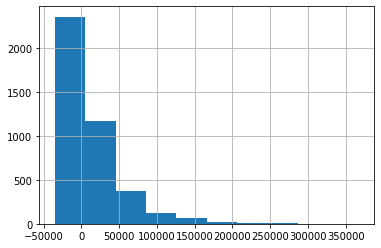

In [92]:
x.hist()

In [93]:
### Decision Tree
from sklearn.tree import DecisionTreeRegressor
mod=DecisionTreeRegressor(max_depth=4)

mod=mod.fit(train_X,train_y['Total_Amt'])

In [94]:
train_pred_dt=mod.predict(train_X)
test_pred_dt=mod.predict(test_X)

print(np.sqrt(((train_y['Total_Amt'] - train_pred_dt) ** 2).mean()))
print("\n")
print(np.sqrt(((test_y['Total_Amt'] - test_pred_dt) ** 2).mean()))


35812.75847574997


36721.461911313934


In [95]:
mod1=DecisionTreeRegressor(max_depth=4)

mod1=mod1.fit(train_X,train_y['tar'])

train_pred_logi=mod1.predict(train_X)
test_pred_logi=mod1.predict(test_X)

print(np.sqrt(((train_y['Total_Amt'] - np.exp(train_pred_logi)) ** 2).mean()))
print("\n")
print(np.sqrt(((test_y['Total_Amt'] - np.exp(test_pred_logi)) ** 2).mean()))


38816.13917751102


39150.24164019536


##### Observe that the error is very high
- Is it because we are trying to predict revenue for each individual. But is it really the way to solve this problem
- If we can give in a more coarse form like which of them could be high revenue generating customers, or mid or low revenue generating customers, would that be sufficient for target marketing 

In [96]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier(class_weight='balanced')
mod=mod.fit(train_X,train_y['class'])

train_pred=mod.predict(train_X)
test_pred=mod.predict(test_X)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(train_y['class'],train_pred))
print("\n")
print(classification_report(test_y['class'],test_pred))

             precision    recall  f1-score   support

          0       0.79      0.93      0.86      2041
          1       0.92      0.76      0.83      2075

avg / total       0.86      0.85      0.85      4116



             precision    recall  f1-score   support

          0       0.55      0.60      0.58       898
          1       0.55      0.50      0.52       867

avg / total       0.55      0.55      0.55      1765



In [99]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4,class_weight='balanced'),
    n_estimators=500,learning_rate=0.1,
)
classifier.fit(train_X, train_y['class'])

C:\Users\Somagiri\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=None)

In [100]:
train_pred=classifier.predict(train_X)
test_pred=classifier.predict(test_X)

In [101]:
print(classification_report(train_y['class'],train_pred))
print("\n")
print(classification_report(test_y['class'],test_pred))

             precision    recall  f1-score   support

          0       0.73      0.77      0.75      2041
          1       0.76      0.71      0.74      2075

avg / total       0.74      0.74      0.74      4116



             precision    recall  f1-score   support

          0       0.60      0.59      0.59       898
          1       0.58      0.58      0.58       867

avg / total       0.59      0.59      0.59      1765



In [102]:
print(confusion_matrix(test_y['class'],test_pred))

[[532 366]
 [362 505]]


In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
classifier = GradientBoostingClassifier(
    n_estimators=500,learning_rate=0.15,
)
classifier.fit(train_X, train_y['class'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [105]:
train_pred=classifier.predict(train_X)
test_pred=classifier.predict(test_X)

print(classification_report(train_y['class'],train_pred))
print("\n")
print(classification_report(test_y['class'],test_pred))

             precision    recall  f1-score   support

          0       0.68      0.71      0.69      2041
          1       0.70      0.67      0.69      2075

avg / total       0.69      0.69      0.69      4116



             precision    recall  f1-score   support

          0       0.61      0.60      0.60       898
          1       0.59      0.60      0.59       867

avg / total       0.60      0.60      0.60      1765



##### We can also perform cluster analysis based on the transactions data and the features generated from those. This cluster information would be useful for target marketing as well